In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
col_names = ['pregnant', 'glucose', 'bp' , 'skin' , 'insulin', 'bmi', 'pedigree' , 'age' , 'label' ]
data = pd.read_csv('data/diabetes.csv', header= None, names=col_names )
print(data.shape)
data.head()

(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [7]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age' , 'glucose' , 'bp' , 'pedigree' ]
x=data[feature_cols]
y=data.label

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape,
y_test.shape)

(614, 7)

(614,)

(154, 7)

(154,)

In [9]:
model= DecisionTreeClassifier(criterion='entropy' , random_state=5)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print('y_pred: ', y_pred)

y_pred:  [1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1
 0 0 1 1 0 1]


In [10]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ', Accuracy_score)

Confusion Matrix :  [[77 23]
 [19 35]]
Accuracy Score :  0.7272727272727273


In [11]:
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

Accuracy in Percentage :  72 %


<Axes: xlabel='Predicted', ylabel='Actual'>

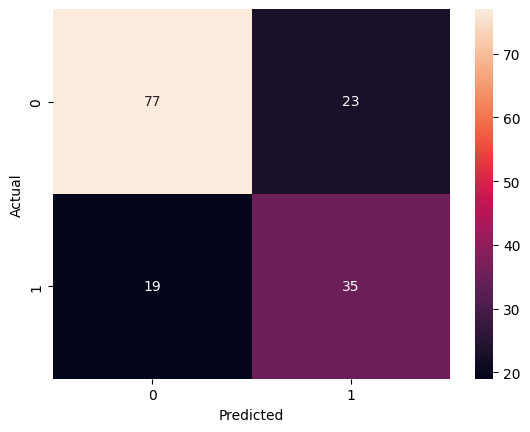

In [13]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual' ],colnames=['Predicted' ])
sns.heatmap(conf_mat, annot=True)

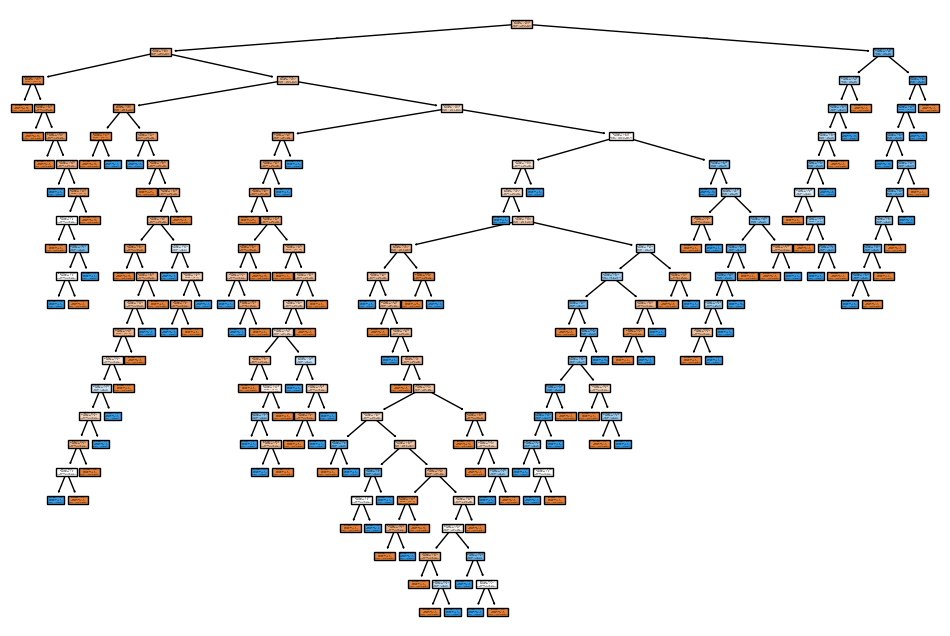

In [16]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=feature_cols, class_names=['Not Diabetic', 'Diabetic'], filled=True)
plt.show()